# Take grayscale image of size 512x512, add some salt & pepper noise and perform the following operations –

(a) Apply average and median spatial filters with 5x5 mask and observe their performance for noise suppression in term of PSNR

(b) Use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression and observe their performance in term of PSNR

(c) Apply harmonic and geometric mean filter on the noisy image and compare their performance with PSNR

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

(512, 512)


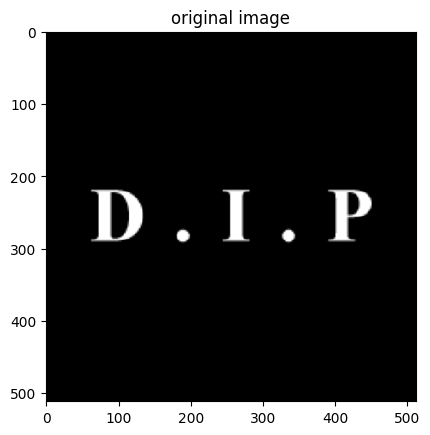

In [2]:
# image = cv.imread('character_pattern.tif', cv.IMREAD_GRAYSCALE)
image = cv.imread('dip.tif', cv.IMREAD_GRAYSCALE)

image = cv.resize(image, (512, 512))
print(image.shape)

plt.imshow(image, cmap='gray')
plt.title('original image')
plt.show()

# Function to add Salt and Pepper Noise

```python 
x = [np.random.randint(0, i-1, 5) for i in (50, 50)]
print(x)

output:
```
[array([11, 16, 47,  8, 27], dtype=int32),

array([27, 41, 19, 24,  4], dtype=int32)]
```

In [3]:
def add_salt_and_pepper_noise(image, amount=0.05, salt_vs_pepper=0.5):
    """
    Add salt and pepper noise to an image.
    
    Parameters:
        image (numpy.ndarray): Input image.
        amount (float): Proportion of pixels to be replaced with noise.
        
    Returns:
        numpy.ndarray: Noisy image.
    """
    
    noisy = np.copy(image)
    total_pixels = noisy.size

    height, width = noisy.shape

    num_salt = int(amount * total_pixels * salt_vs_pepper)
    num_pepper = int(amount * total_pixels * (1.0 - salt_vs_pepper))


    # # add salt (white pixels)
    # coordinates = [np.random.randint(0, i-1, num_salt) for i in noisy.shape]
    # noisy[coordinates[0], coordinates[1]] = 255

    # # add pepper (black pixels)
    # coordinates = [np.random.randint(0, i-1, num_pepper) for i in noisy.shape]
    # noisy[coordinates[0], coordinates[1]] = 0

    # Add salt (white pixels)
    for _ in range(num_salt):
        x = np.random.randint(0, height)
        y = np.random.randint(0, width)
        noisy[x, y] = 255

    # Add pepper (black pixels)
    for _ in range(num_pepper):
        x = np.random.randint(0, height)
        y = np.random.randint(0, width)
        noisy[x, y] = 0

    return noisy



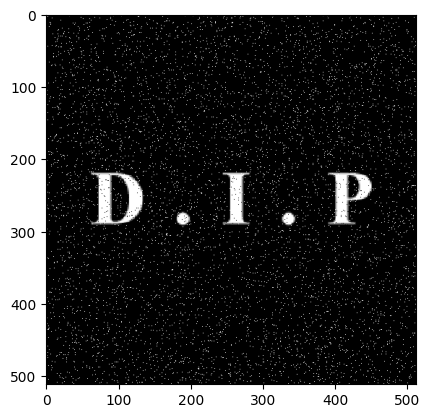

In [4]:
noisy_image = add_salt_and_pepper_noise(image, amount=0.05, salt_vs_pepper=0.5)

plt.imshow(noisy_image, cmap='gray')

# Function for Average filter

In [5]:
# def average_filter(image, kernel_size):
#     return cv.blur(image, (kernel_size, kernel_size))


def average_filter(image, mask_size):
    """
    Apply average filter (mean filter) to the input image manually.
    
    Args:
        image (numpy array): Input grayscale image.
        mask_size (int): Size of the averaging mask (must be odd, like 3, 5, 7).
    
    Returns:
        numpy array: Filtered image.
    """
    # Ensure mask_size is odd
    if mask_size % 2 == 0:
        raise ValueError("Mask size must be an odd number.")
    
    # Padding
    pad = mask_size // 2
    padded_image = np.pad(image, pad, mode='reflect')
    
    # Prepare output image
    output = np.zeros_like(image, dtype=np.float64)
    
    # Average filter: kernel values are 1/(mask_size*mask_size)
    kernel_value = 1.0 / (mask_size * mask_size)
    
    # Convolve manually
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            block = padded_image[i:i+mask_size, j:j+mask_size]
            output[i, j] = np.sum(block) * kernel_value
    
    return np.clip(output, 0, 255).astype(np.uint8)


# Function for median filter

In [6]:
# def median_filter(image, kernel_size):
#     return cv.medianBlur(image, kernel_size)

def median_filter(image, mask_size):
    """
    Apply median filter manually to the input image.
    
    Args:
        image (numpy array): Input grayscale image.
        mask_size (int): Size of the median mask (must be odd, like 3, 5, 7).
    
    Returns:
        numpy array: Median filtered image.
    """
    # Ensure mask_size is odd
    if mask_size % 2 == 0:
        raise ValueError("Mask size must be an odd number.")
    
    # Padding
    pad = mask_size // 2
    padded_image = np.pad(image, pad, mode='reflect')
    
    # Prepare output image
    output = np.zeros_like(image, dtype=np.float64)
    
    # Convolve manually
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            block = padded_image[i:i+mask_size, j:j+mask_size]
            output[i, j] = np.median(block)
    
    return np.clip(output, 0, 255).astype(np.uint8)


# Calculate PSNR

In [7]:
def psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')  # No error → Infinite PSNR
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

# --------------------------------(A)----------------------------------

PSNR of average filter (5x5): 30.96
PSNR of median filter (5x5): 50.22


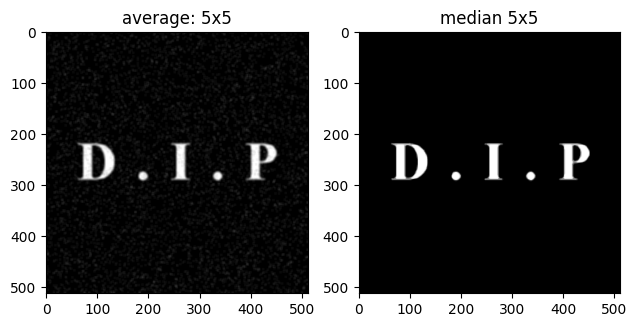

In [8]:
avg_5x5 = average_filter(noisy_image, 5)
med_5x5 = median_filter(noisy_image, 5)

psnr_avg_5x5 = psnr(image, avg_5x5)
psnr_med_5x5 = psnr(image, med_5x5)

print(f'PSNR of average filter (5x5): {psnr_avg_5x5:.2f}')
print(f'PSNR of median filter (5x5): {psnr_med_5x5:.2f}')


plt.subplot(121)
plt.imshow(avg_5x5, cmap='gray')
plt.title("average: 5x5")

plt.subplot(122)
plt.imshow(med_5x5, cmap='gray')
plt.title("median 5x5")

plt.tight_layout()
plt.show()

# Apply average filter with 3x3, 5x5, 7x7

In [9]:
for kernel_size in [3, 5, 7]:
    avg_image = average_filter(noisy_image, kernel_size)
    psnr_value = psnr(image, avg_image)
    print(f'PSNR of average filter ({kernel_size}x{kernel_size}): {psnr_value:.2f}')

PSNR of average filter (3x3): 40.26
PSNR of average filter (5x5): 30.96
PSNR of average filter (7x7): 30.66


# Function for harmonic filter

In [10]:
def harmonic_filter(image, kernel_size):
    image = image.astype(np.float32) + 1e-5 # avoid division by zero

    height, width = image.shape
    pad = kernel_size // 2

    # padded = cv.copyMakeBorder(image, pad, pad, pad, pad, cv.BORDER_REFLECT)
    padded = np.pad(image, pad, mode='reflect')

    result = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = kernel_size * kernel_size / np.sum(1.0 / window)

    return np.clip(result, 0, 255).astype(np.uint8)

# Function for Geometric Mean filter

In [11]:
def geometric_mean_filter(image, kernel_size):
    image = image.astype(np.float32) + 1e-5 # avoid log(0)

    height, width = image.shape
    pad = kernel_size // 2

    # padded = cv.copyMakeBorder(image, pad, pad, pad, pad, cv.BORDER_REFLECT)
    padded = np.pad(image, pad, mode='reflect')

    result = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.exp(np.mean(np.log(window)))

    return np.clip(result, 0, 255).astype(np.uint8)

# Apply Harmonic Mean and Geometric Mean filters

In [12]:
harmonic_image = harmonic_filter(noisy_image, 5)
geometric_image = geometric_mean_filter(noisy_image, 5)

psnr_harmonic = psnr(image, harmonic_image)
psnr_geometric = psnr(image, geometric_image)

print(f'PSNR of harmonic filter (5x5): {psnr_harmonic:.2f}')
print(f'PSNR of geometric mean filter (5x5): {psnr_geometric:.2f}')

PSNR of harmonic filter (5x5): 46.23
PSNR of geometric mean filter (5x5): 45.57


# show all images

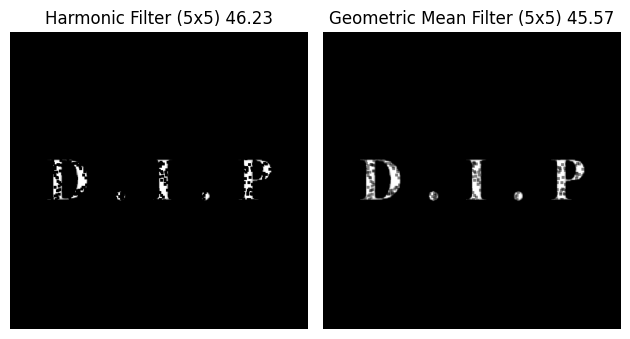

In [13]:
plt.subplot(121)
plt.imshow(harmonic_image, cmap='gray')
plt.title(f'Harmonic Filter (5x5) {psnr_harmonic:.2f}')
plt.axis('off')

plt.subplot(122)
plt.imshow(geometric_image, cmap='gray')
plt.title(f'Geometric Mean Filter (5x5) {psnr_geometric:.2f}')
plt.axis('off')
plt.tight_layout()
plt.show()
